In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
dados = pd.read_csv ('/content/AB_NYC_2019.csv')

In [3]:
dados.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


## Média de preços de alugueis por região


In [4]:
import plotly.express as px

# Selecionar as colunas 'price' e 'neighbourhood_group'
colunas = 'price', 'neighbourhood_group'

# Criando Primary_Key
group_by = 'neighbourhood_group'

# Agrupando por região
dados.loc[:, colunas].groupby(group_by).mean().reset_index()

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


## Qual é o valor do aluguel (diária) mais caro de cada região da cidade de Nova York?

In [9]:
# Recolher os dados da coluna de aluguel 'price' e 'neighbourhood_group'

colunas = 'price' , 'neighbourhood_group'
primary_key = ['neighbourhood_group']

# Agrupar por 'neighbourhood_group' max()

data_plot = dados.loc[:,colunas ].groupby( primary_key ).max().reset_index()

# Gráfico de colunas histograma
px.bar( data_plot, x='neighbourhood_group', y='price')

## Qual o maior valor do aluguel por bairro e por tipo de quarto?


In [12]:
# Selecionar as colunas 'price', 'neighbourhood' e 'room_type'
colunas = ['price'
           ,'neighbourhood'
           ,'room_type']

# Agrupar por 'neighbourhood' e 'room_type'
group_by = ['neighbourhood'
            ,'room_type']

# Max para exibir qual o maior valor
dados.loc [:,colunas].groupby(group_by).max().reset_index()

,neighbourhood,room_type,price
0,Allerton,Entire home/apt,450
1,Allerton,Private room,142
2,Arden Heights,Entire home/apt,83
3,Arden Heights,Private room,41
4,Arrochar,Entire home/apt,625
...,...,...,...
535,Woodlawn,Shared room,70
536,Woodrow,Entire home/apt,700
537,Woodside,Entire home/apt,500
538,Woodside,Private room,475


## Qual o menor valor de latitude região?

In [6]:
colunas = [ 'neighbourhood_group'
           ,'latitude' ]

group_by = [ 'neighbourhood_group' ]

# Min para exibir o menor valor de latitude por região
dados_para_grafico = dados.loc [ : , colunas ].groupby( group_by ).min().reset_index()

# Gráfico de barras
px.bar (dados_para_grafico,x = 'neighbourhood_group', y = 'latitude', text = 'latitude' )

## ID dos proprietários que possuem mais de um imóvel cadastrado.


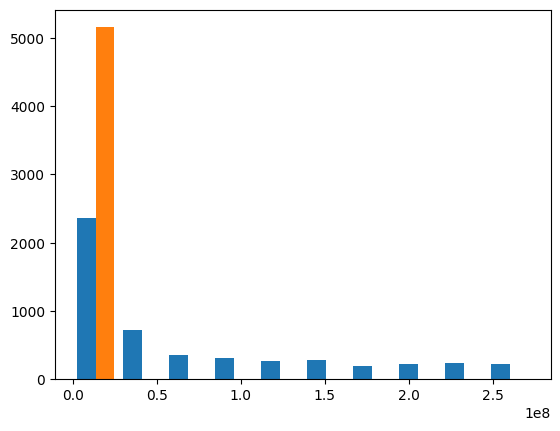

In [7]:
# Selecionar as colunas 'host_name' e 'calculated_host_listings_count', sendo essa última > 2
colunas = ['host_id' , 'calculated_host_listings_count']
linhas = dados.loc [:, 'calculated_host_listings_count'] > 1

# Agrupar por proprietário
group_by = ['host_id']

# Filtrar apenas os com mais de 2
data_plot = dados.loc [linhas,colunas].groupby(group_by).count().reset_index()

# Histograma
plt.hist(data_plot);